# ДМ-3(2023) Colab1. Template

###  Ім'я Прізвище, група, варіант №


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math

📕 Інструкція з Markdown https://www.markdownguide.org

📕 Короткий довідник з набору формул $\TeX$  https://ru.wikibooks.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%B2_LaTeX 

**Користуватись ресурсами в інтернеті не заборонено! Однак, якщо ви використовуєте код, довідкові матеріали з інтернету або літератури, ОБОВ'ЯЗКОВО вказуйте посилання на ці матеріали в коментарях! Інакше це буде розцінено як плагіат і завдання не буде зараховано**

**Виконувати завдання слід САМОСТІЙНО. У разі виявлення однакових розв'язків роботи будуть анульовані!**

**Для завдань 1, 2, 3 можна використовувати лише ті пакети, які вказано вище**

### Завдання 1: відношення 

1️⃣  ✔️ *Знайдіть своє бінарне відношення $R$ у файлі з варіантами та вкажіть тут.*

$$R = \{(x, y) \in \mathbb{R}^2 : x > 1, y > 1, x + y < 10\}$$

Побудуйте графік бінарного відношення $R$. Використовуйте бібліотеку matplotlib.pyplot

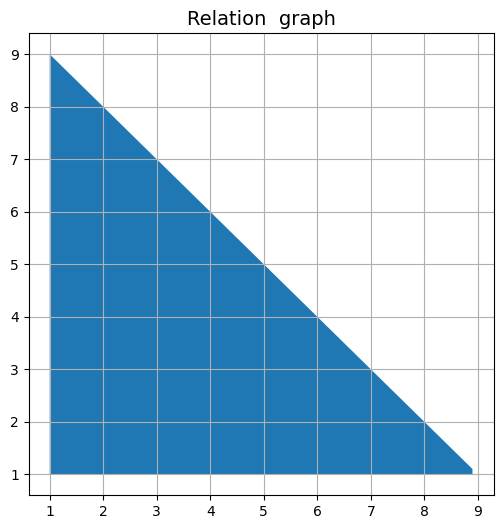

In [6]:
# Create a new figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
fig = plt.figure(figsize=(6, 6)) 

# Axes is the contiainer for plot or other figure elements. There can be some axes in the only figure
# https://matplotlib.org/stable/api/axes_api.html#
ax = plt.gca()

# Set x range and y
x = np.arange(1, 9, 0.1)
y = 10 - x

# Plotting
ax.fill_between(x, y, 1)
ax.set_title("Relation  graph", fontsize=14)
ax.grid(visible=True)

Для самоперевірки було використано desmos.com для побудови такого самого графіку
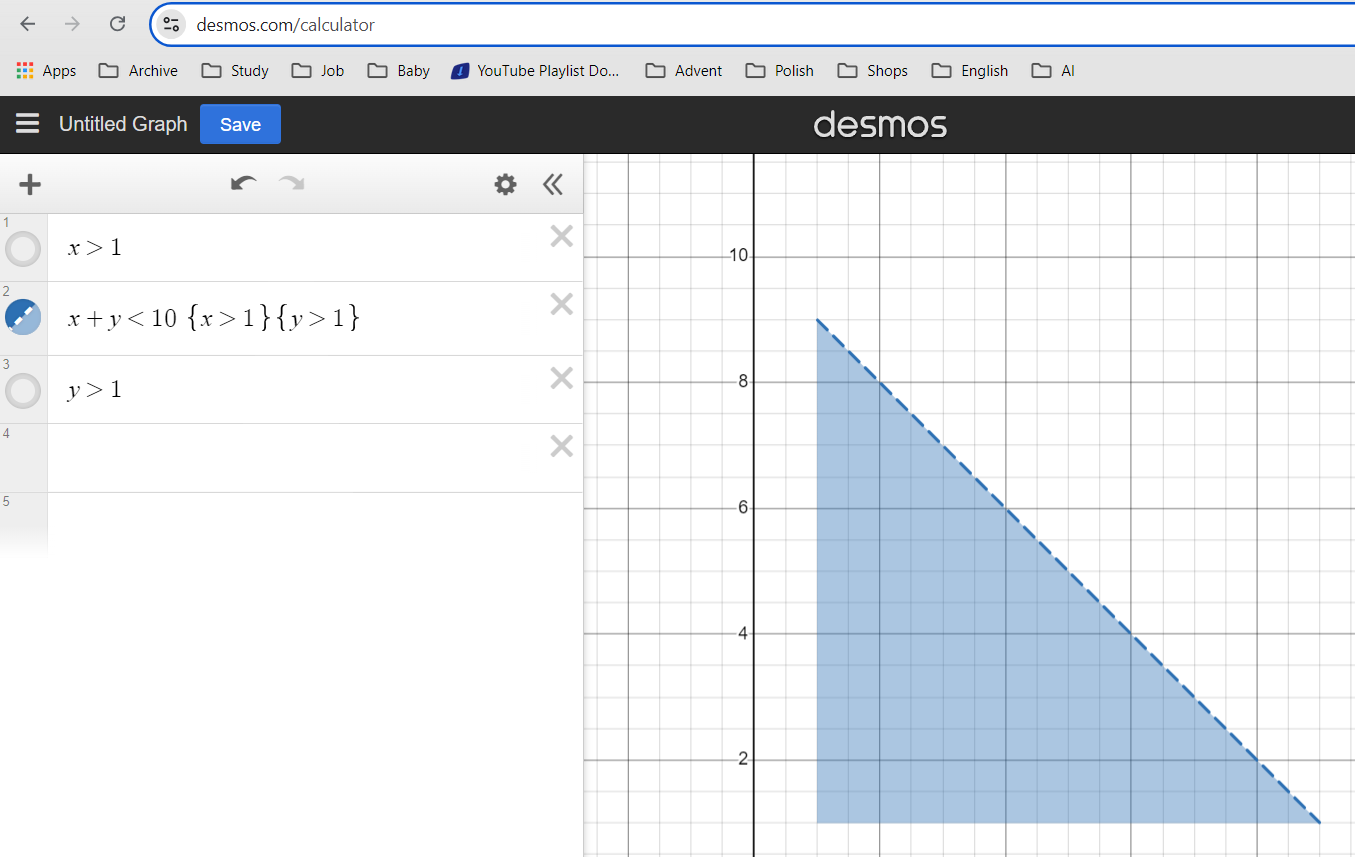

<font color="red"> *Коментар викладача:* <font> 

2️⃣  З'ясуйте, чи є $R$ рефлексивним, симетричним, транзитивним.

✔️ *Відповіді й поянення запишіть тут.*

$R$ не є рефлексивним, оскільки для $x=9$ точка (9;9) не лежить в $R$.

$R$ є симетричним, оскільки якщо $(x;y)$ лежить в $R$, то і $(y;x)$ лежить в $R$

$R$ не є транзитивним, оскільки для $x=7, y=2, z=7$, $(x;y) \in R, (y, z) \in R$, проте $(x,z)$ не належить $R$.

<font color="red"> *Коментар викладача:* <font> 

3️⃣ ✔️ *Знайдіть свій чум $P$ у файлі з варіантами та вкажіть тут*

$P$ - множина подмножин множини $A = \{1, 2, c, d\}$, які містять хоча б одну цифру та хоча б одну букву (впорядкування за включенням)

Побудуйте діаграму Гассе $P$. Ви можете використовувати бібліотеку для роботи із графами networkx (https://networkx.org/documentation/stable/)

*Якщо networkx не захоче малювати граф і видасть помилку random_state_index is incorrect, слід зменшити версію пакета decorator до 5.0.5. Якщо у вас Windows та Anaconda, то у вікні Anaconda Prompt достатньо набрати pip install decorator==5.0.5*

Запишемо усі елементи $P$:
$
A_1 = \{1,c\} \\
A_2 = \{1,d\} \\
A_3 = \{2,c\} \\
A_4 = \{2,d\} \\
A_5 = \{1,2,c\} \\
A_6 = \{1,2,d\} \\
A_7 = \{1,c,d\} \\
A_8 = \{2,c,d\} \\
A_9 = \{1,2,c,d\} 
$

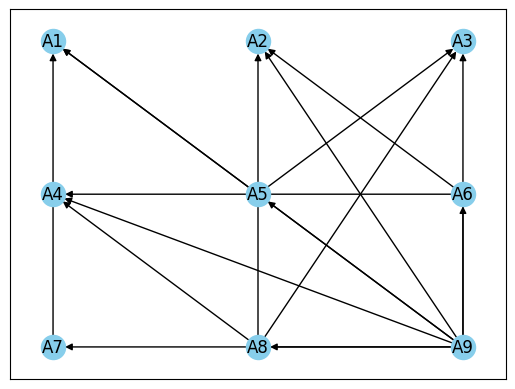

In [129]:
P = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9"] # elements of the poset
order = [("A5", "A1"), ("A7", "A1"), ("A9", "A1"),
         ("A6", "A2"), ("A8", "A2"), ("A9", "A2"),
         ("A5", "A3"), ("A8", "A3"), ("A9", "A3"),
         ("A6", "A4"), ("A8", "A4"), ("A9", "A4"),
         ("A9", "A5"), ("A9", "A6"), ("A9", "A7"), ("A9", "A8")
        ] # ordering: (y, x) means y covers x

Hasse = nx.DiGraph()
Hasse.add_nodes_from(P)
Hasse.add_edges_from(order)

P = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9"]
# set the positions of nodes manually
pos = {
    "A1": (-1, 1), "A2": (0, 1), "A3": (1, 1),
    "A4": (-1, 0), "A5": (0, 0), "A6": (1, 0),
    "A7": (-1, -1), "A8": (0, -1), "A9": (1, -1)
}

# draw graph
nx.draw_networkx(Hasse, with_labels=True, pos=pos, node_color="skyblue")

<font color="red"> *Коментар викладача:* <font> 

4️⃣ Напишіть функцію для обчислення значень функції Мебіуса на $P$. Виведіть їх у вигляді таблиці.

$P$ - множина подмножин множини $A = \{1, 2, c, d\}$, які містять хоча б одну цифру та хоча б одну букву (впорядкування за включенням)

Ви можете використовувати пакет pandas (https://pandas.pydata.org/docs/user_guide/index.html)
для створення та виведення таблиці.

Вам можуть знадобитися інструменти пакету networkx для

1) пошуку інтервалів у чум (див. networkx.algorithms.simple_paths.all_simple_paths)

2) упорядкування вершин діаграми Гассе ''за рівнями'' (див. networkx.algorithms.traversal.breadth_first_search.bfs_tree)

Для розв'язку використано безпосередню рекурсію, а саме для кожної вершини шукаємо шляхи, які від неї йдуть, якщо шляхів немає, то функція рівна 0, якщо шлях 1, то маємо покриття, тому функція рівна -1, якщо є довші шляхи, то зливаємо всі вершини, відкидаємо y і це будуть наші елементи, які менші y, проте більші x. Для них обчислюємо функцію рекурсивно. Беремо суму із зна

In [160]:
def mobius_value(P, order, Hasse, x, y):
    if x == y:
        return 1
    pathes = list(nx.algorithms.simple_paths.all_simple_paths(Hasse, x, y))
    if len(pathes) == 0:
        return 0
    if len(pathes) == 1:
        return -1
    z = [item for sublist in pathes for item in sublist]
    z = set(z)
    z.remove(y)
    z = list(z)
    res = [mobius_value(P, order, Hasse, x, z0) for z0 in z]
    return -sum(res)

mobius_value(P, order, Hasse, "A9", "A1")

1

In [161]:
# write your code here
def mobius_table(P, order):
    n = len(P)
    res = np.identity(n, dtype=int)
    for i in range(n):
        for j in range(i+1, n):
            res[i][j] = mobius_value(P, order, Hasse, P[j], P[i])
    return pd.DataFrame(res, columns=P, index=P)

mobius_table(P, order)

,A1,A2,A3,A4,A5,A6,A7,A8,A9
A1,1,0,0,0,-1,0,-1,0,1
A2,0,1,0,0,0,-1,0,-1,1
A3,0,0,1,0,-1,0,0,-1,1
A4,0,0,0,1,0,-1,0,-1,1
A5,0,0,0,0,1,0,0,0,-1
A6,0,0,0,0,0,1,0,0,-1
A7,0,0,0,0,0,0,1,0,-1
A8,0,0,0,0,0,0,0,1,-1
A9,0,0,0,0,0,0,0,0,1


<font color="red"> *Коментар викладача:* <font> 

### Завдання 2: групи

✔️ *Свою групу знайдіть у файлі з варіантами та вкажіть тут*

Група $\mathbb{Z}_3^2$, елементами якої є всі набори $(a_1, a_2)$, де $a_i \in \mathbb{Z}_3$, а операція визначено як покомпонентне додавання.

1️⃣ Складіть таблицю множення.

Ви можете використати бібліотеку pandas, щоб вивести таблицю у зручному вигляді

Будь ласка, забезпечте розв'язок коментарями, як саме ви обчислюєте елементи таблиці (власноруч, подаючи підстановками,
реалізуючи деяку функцію, знайшли готову в інтернеті тощо)

Спершу генеруємо масив для $\mathbb{Z}_3=\{0, 1, 2\}$, відповідно $\mathbb{Z}_3^2=\{(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)\}$ генеруємо як пари. Далі сумуємо елементи утворюючи масив. Елементи масиву переводимо рядок та за допомогою numpy reshape трансвормуємо у двовимірний масив. За допомогою pandas передаємо дані та відповідні назви колонок та рядків

In [59]:
array = [0, 1, 2]
elements = [(x, y) for x in array for y in array] # 9 elements
elements_names = [str(e) for e in elements]
print(elements)
grid = [((x[0] + y[0]) % 3, (x[1] + y[1]) % 3) for x in elements for y in elements]
grid = [str(e) for e in grid]
grid = np.array(grid).reshape(len(elements),len(elements))
Cayley_table = pd.DataFrame(grid, columns=elements_names, index=elements_names)
Cayley_table

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)"
"(0, 0)","(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)"
"(0, 1)","(0, 1)","(0, 2)","(0, 0)","(1, 1)","(1, 2)","(1, 0)","(2, 1)","(2, 2)","(2, 0)"
"(0, 2)","(0, 2)","(0, 0)","(0, 1)","(1, 2)","(1, 0)","(1, 1)","(2, 2)","(2, 0)","(2, 1)"
"(1, 0)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(0, 0)","(0, 1)","(0, 2)"
"(1, 1)","(1, 1)","(1, 2)","(1, 0)","(2, 1)","(2, 2)","(2, 0)","(0, 1)","(0, 2)","(0, 0)"
"(1, 2)","(1, 2)","(1, 0)","(1, 1)","(2, 2)","(2, 0)","(2, 1)","(0, 2)","(0, 0)","(0, 1)"
"(2, 0)","(2, 0)","(2, 1)","(2, 2)","(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)"
"(2, 1)","(2, 1)","(2, 2)","(2, 0)","(0, 1)","(0, 2)","(0, 0)","(1, 1)","(1, 2)","(1, 0)"
"(2, 2)","(2, 2)","(2, 0)","(2, 1)","(0, 2)","(0, 0)","(0, 1)","(1, 2)","(1, 0)","(1, 1)"


<font color="red"> *Коментар викладача:* <font> 

2️⃣ Охарактеризуйте групу. Чому дорівнює її порядок? Чи є група абелевою? Чи є група циклічною?

✔️ *Свої спостереження напишіть тут.*


$\mathbb{Z}_3^2=\{(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)\}$

Порядок групи дорівнює $6$.

Група є абелевою, адже приведена вище таблиця симетрична

Група не є циклічною, оскільки немає елементу порядку 6 (див. обчислення порядків елементів далі).

<font color="red"> *Коментар викладача:* <font> 

3️⃣ Напишіть функцію, яка обчислює порядок елемента групи. Знайдіть порядки всіх елементів групи.

In [64]:
# write your code here
def element_order(x, Cayley_table):
    res = str(x)
    i = 1
    while res != '(0, 0)':
        res = Cayley_table[res][str(x)]
        i += 1
    return i
element_order(elements[1], Cayley_table)

3

In [65]:
for x in elements:
    print("Order of {} equals {}".format(x,  element_order(x, Cayley_table)))

Order of (0, 0) equals 1
Order of (0, 1) equals 3
Order of (0, 2) equals 3
Order of (1, 0) equals 3
Order of (1, 1) equals 3
Order of (1, 2) equals 3
Order of (2, 0) equals 3
Order of (2, 1) equals 3
Order of (2, 2) equals 3


4️⃣ Знайдіть усі підгрупи групи

✔️ *Свої міркування напишіть тут.*

За теоремою Лагранжа можливими порядками підгруп можуть бути дільники порядку групи, тобто 1, 2, 3, 6.

Підгрупа порядку 1 – тривіальна підгрупа $\{(0, 0)\}$.

Підгрупа порядку 6 - це група $\mathbb{Z}_3^2$.

Підгрупи порядків 2 і 3 - групи простого порядку, отже, циклічні.
Усі нетривіальні циклічні підгрупи перераховані нижче

In [67]:
# write your code here
def cycle_subgroup(x, Cayley_table):
    res_arr = [str(x)]
    res = str(x)
    i = 1
    while res != '(0, 0)':
        res = Cayley_table[res][str(x)]
        res_arr.append(res)
    return res_arr

In [68]:
for x in elements[1:]:
    print("subgroup, generated by {} = {}".format(x, 
                                    cycle_subgroup(x, Cayley_table)))

subgroup, generated by (0, 1) = ['(0, 1)', '(0, 2)', '(0, 0)']
subgroup, generated by (0, 2) = ['(0, 2)', '(0, 1)', '(0, 0)']
subgroup, generated by (1, 0) = ['(1, 0)', '(2, 0)', '(0, 0)']
subgroup, generated by (1, 1) = ['(1, 1)', '(2, 2)', '(0, 0)']
subgroup, generated by (1, 2) = ['(1, 2)', '(2, 1)', '(0, 0)']
subgroup, generated by (2, 0) = ['(2, 0)', '(1, 0)', '(0, 0)']
subgroup, generated by (2, 1) = ['(2, 1)', '(1, 2)', '(0, 0)']
subgroup, generated by (2, 2) = ['(2, 2)', '(1, 1)', '(0, 0)']


<font color="red"> *Коментар викладача:* <font> 

5️⃣ **Системою твірних $S$ групи $G$** називається така підмножина $S$ елементів групи $G$, що кожен елемент групи можна подати у вигляді скінченного добутку елементів $S$ та обернених до них.

Система твірних визначена неоднозначно. Наприклад, для циклічної групи система твірних може складатися з одного елемента - будь-якого твірного цієї групи.

Знайдіть систему твірних з якнайменшим числом елементів для групи.

✔️ *Свої міркування напишіть тут.*
$\mathbb{Z}_3^2=\{(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)\}$
Оскільки $\mathbb{Z}_3^2$ не є циклічною, система твірних складається щонайменше з двох елементів. Покажемо, що множина $(0, 1), (1, 0)$ є системою твірних.

Справді (див. таблицю множення):

$(0, 0)= (0, 1)(0, 1)(0, 1)$

$(0, 1) = (0, 1) $

$(0, 2)= (0, 1)(0, 1)$

$(1, 0)= (1, 0)$

$(1, 1) = (0, 1)(1, 0) $

$(1, 2)= (0, 1)(0, 1)(1, 0)$

$(2, 0)= (1, 0)(1, 0)$

$(2, 1)= (0, 1)(1, 0)(1, 0)$

$(2, 2)= (0, 1)(0, 1)(1, 0)(1, 0)$

<font color="red"> *Коментар викладача:* <font> 

6️⃣ Нехай $S$ - система твірних групи $G$. **Графом Келі групи $G$** називається орієнтований граф, вершинами якого є елементи групи, а орієнтоване ребро поєднує вершини $x$, $y$, якщо знайдеться такий елемент $s\in S$, що $y = sx$ .

Побудуйте граф Келлі групи. Використовуйте пакет networkx.

In [72]:
# write your code here
def get_orders(S, P, Cayley_table):
    '''
    S - система твірних
    P - всі елементи
    Cayley_table - таблиця Келі
    '''
    order = [(x, Cayley_table[s][x]) for x in P for s in S]
    order = list(set(order)) # remove duplicates
    return order
S = ['(0, 1)', '(1, 0)']
P = elements_names
print(P)
order = get_orders(S, P, Cayley_table)
order

['(0, 0)', '(0, 1)', '(0, 2)', '(1, 0)', '(1, 1)', '(1, 2)', '(2, 0)', '(2, 1)', '(2, 2)']


[('(2, 1)', '(0, 1)'),
 ('(1, 2)', '(1, 0)'),
 ('(2, 2)', '(0, 2)'),
 ('(0, 1)', '(1, 1)'),
 ('(0, 2)', '(0, 0)'),
 ('(1, 1)', '(2, 1)'),
 ('(1, 2)', '(2, 2)'),
 ('(2, 0)', '(0, 0)'),
 ('(1, 0)', '(2, 0)'),
 ('(0, 0)', '(0, 1)'),
 ('(0, 1)', '(0, 2)'),
 ('(2, 2)', '(2, 0)'),
 ('(2, 0)', '(2, 1)'),
 ('(1, 0)', '(1, 1)'),
 ('(2, 1)', '(2, 2)'),
 ('(0, 0)', '(1, 0)'),
 ('(0, 2)', '(1, 2)'),
 ('(1, 1)', '(1, 2)')]

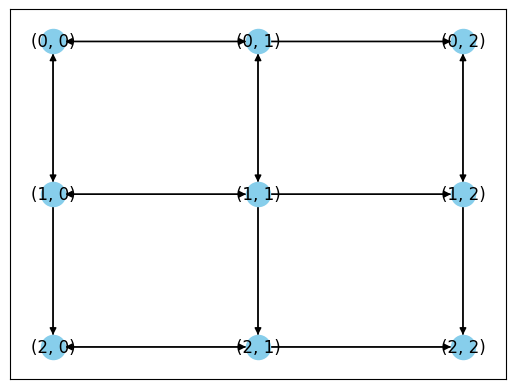

In [74]:
Hasse = nx.DiGraph()
Hasse.add_nodes_from(P)
Hasse.add_edges_from(order)

# set the positions of nodes manually
pos = {
    "(0, 0)": (-1, 1), "(0, 1)": (0, 1), "(0, 2)": (1, 1),
    "(1, 0)": (-1, 0), "(1, 1)": (0, 0), "(1, 2)": (1, 0),
    "(2, 0)": (-1, -1), "(2, 1)": (0, -1), "(2, 2)": (1, -1)
}

# draw graph
nx.draw_networkx(Hasse, with_labels=True, pos=pos, node_color="skyblue")

<font color="red"> *Коментар викладача:* <font> 

### Завдання 3: задача з програмування

Оберіть та розв'яжіть **одну** з задач для програмування 1.8, 2.11, 5.8, 6.13, 7.13, 7.14
з аркушів для практичних занять (див. у Google Classroom)

1.8. Напишiть програму, яка для заданої скiнченної множини i вiдношення на
цiй множинi (тобто заданої сiм’ї упорядкованих пар елементiв множини) визначає,
чи є вiдношення симетричним, рефлексивним i транзитивним.

Для перевірки візьмемо відношення із завдання 3, а також випадкове відношення

In [97]:
#write your code here
# 1.8
def is_symmetric(elements, order):
    order = set(order)
    for e in elements:
        if not((e, e) in order):
            print(f"{e, e} is not in order")
            return False
    return True

def is_reflecsive(elements, order):
    order = set(order)
    for o in order:
        if not((o[1], o[0]) in order):
            print(f"For {o}: {(o[1], o[0])} is not in order")
            return False
    return True

def is_transitive(elements, order):
    order = set(order)
    for o1 in order:
        for o2 in order:
            if o1[1] == o2[0]:
                if not((o1[0], o2[1]) in order):
                    print(f"For {o1}, {o2}: {(o1[0], o2[1])} is not in order")
                    return False
    return True

In [98]:
elements = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9"] # elements of the poset
order = [("A5", "A1"), ("A7", "A1"), ("A9", "A1"),
         ("A6", "A2"), ("A8", "A2"), ("A9", "A2"),
         ("A5", "A3"), ("A8", "A3"), ("A9", "A3"),
         ("A6", "A4"), ("A8", "A4"), ("A9", "A4"),
         ("A9", "A5"), ("A9", "A6"), ("A7", "A9"), ("A8", "A9")
        ] # ordering: (y, x) means y covers x

print(is_symmetric(elements, order))
print(is_reflecsive(elements, order))
print(is_transitive(elements, order))

('A1', 'A1') is not in order
False
For ('A5', 'A1'): ('A1', 'A5') is not in order
False
For ('A7', 'A9'), ('A9', 'A3'): ('A7', 'A3') is not in order
False


In [100]:
elements = [1, 3, 5, -1] # elements of the poset
order = [(1, 1), (3, 3), (5, 5), (-1, -1),
         (1, 3), (3, 1), (5, 1)
        ] # ordering: (y, x) means y covers x

print(is_symmetric(elements, order))
print(is_reflecsive(elements, order))
print(is_transitive(elements, order))

True
For (5, 1): (1, 5) is not in order
False
For (5, 1), (1, 3): (5, 3) is not in order
False


<font color="red"> *Коментар викладача:* <font> 

### Завдання 4: додаткова задача

Оберіть та розв'яжіть **одну** з додаткових задач 1.9, 2.12, 3.10, 4.13, 4.14, 5.9, 6.15, 7.15
з аркушів для практичних занять (див. у Google Classroom)

Якщо для розв'язку потрібні якісь пакети, окрім вказаних на початку блокноту, то вкажіть необхідні імпорти нижче.

In [107]:
# write your imports here
def count_digits(num): # Використано ChatGPT контректно для цієї функції за запитом "Count digits in a number in Python"
    counts = [0] * 10  # Для цифр від 0 до 9
    while num > 0:
        digit = num % 10
        counts[digit] += 1
        num //= 10
    return counts
def are_similar(m, n, debug = True):
    m1 = np.array(count_digits(m))
    n1 = np.array(count_digits(n))
    res = (m1 - n1) % 2
    if debug:
        print(m1)
        print(n1)
        print(res)
    return np.all(res == 0)

# Приклад використання:
print(are_similar(34437, 7449393))  # Виведе True

[0 0 0 2 2 0 0 1 0 0]
[0 0 0 2 2 0 0 1 0 2]
[0 0 0 0 0 0 0 0 0 0]
True


✔️ *Напишіть розв'язок тут.*

1.9. “Схожi” числа. На множинi цiлих невiд’ємних чисел (у десятковому
запису) визначимо двi операцiї:
Викреслення двох однакових цифр, що стоять поруч (наприклад, з 224 можна
зробити 4).
Викреслення двох однакових груп цифр, що стоять поруч (наприклад, з 23231
можна зробити 1).
Скажемо, що числа m i n "схожi якщо одне з них можна отримати з iншого за
допомогою однiєї з операцiй 1) або 2).
Розглянемо вiдношення ∼: m ∼ n, якщо iснує скiнченна послiдовнiсть чисел
m0 = m, m1, . . . , mk = n, в якiй сусiднi числа "схожi".
Наприклад, 34437 ∼ 7449393, оскiльки 34437 "схоже"на 337, 337 "схоже"на 7, 7
"схоже"на 744, 744 "схоже"на 7449393.
1. Доведiть, що вiдношення ∼ є вiдношенням еквiвалентностi.
2. Знайдiть кiлькiсть класiв еквiвалентностi за цим вiдношенням та опишiть цi класи.
3. Напишiть програму, яка за даними m i n визначає, чи правильно, що m ∼ n.


Розв'язок

1. Доведiть, що вiдношення ∼ є вiдношенням еквiвалентностi.
- відношення є симетричним, адже число подібне саме до себе, ніяких перетворень не потрібно здійснювати
- відношення симетричне, бо m ∼ n, то існують перетворення m0 = m, m1, . . . , mk = n, відповідно достатньо розвернути перетворення в зворотньому порядку і отримати n ∼ m
- відношення транзитивне, бо якщо m ∼ s, s ∼ n, то існують перетворення m0 = m, m1, . . . , mk = s, s0=s, s1, ..., sp=n, тоді існує ланцюжок із з'єднаних перетврень: m0 = m, m1, . . . , mk, s1, s2, ... sp=n

2. Знайдiть кiлькiсть класiв еквiвалентностi за цим вiдношенням та опишiть цi класи.

Помітимо, що числа залишаються подібними, якщо в них переставити 2 сусідні цифри. Наприклад, якщо візьмемо число 12 ∼ 122121 ∼ 1121 ∼ 21, аналогічно для будь-якого числа XabY ∼ XabbabaY ∼ XaabaY ∼ XbaY. Відповідно давайте для довільного числа змістимо всі 1 на перші місця, потім всі 2, потім всі 3 і т.д. до 9, потім 0. Отримаємо, що початкове число є схоже на число, що складається з тієї самої кількості 1, 2,... Далі користуючись правилом 1) можемо відкинути парну кількість входжень 1, 2, ...
Відповідно кожне число є подібне до числа 1234567890, де деякі цифри можуть бути пропущені, якщо в початкового числа була парна кількість входжень відповідної цифри.

Використовуючи роздуми про особливості заданої операції, можемо описати класи еквівалентності навівши по 1 елементу із класу. Кожен клас однозначно визначається парністю входження кожної цифри.
Класи еквівалентності = {112233...9900, 0, 1, 2, 3, ..., 12, 13, ..., 123, 124, ...} - тобто це клас, в якому всі цифри входять парну кількість разів, класи, які мають 1 цифру непарну кількість раз, а інші парну, потім класи, які мають по 2 цифри непарну кількість разів, інші парну, і т.д.

3. Напишiть програму, яка за даними m i n визначає, чи правильно, що m ∼ n.
Програму напишемо шляхом обчислення частоти входження кожної цифри у число. Після чого віднімемо частоти 1 числа від 2 і візьмемо по модулю 2, якщо отримано нулі, то числа подібні. 

<font color="red"> *Коментар викладача:* <font> 